# Local Search and Optimization Problem #


## Simulated Annealing ##

In [62]:
import logging
import numpy as np
#from tqdm.notebook import tqdm
from matplotlib import pyplot as plt
from matplotlib import cm
import random

logging.basicConfig(
    format="[%(asctime)s] %(levelname)s: %(message)s",
    datefmt="%H:%M:%S",
    level=logging.INFO,
)

# test functions 
def rastrigin(x, A=10):
    """NumPy Rastrigin test function"""
    return np.sum(A - A * np.cos(2 * np.pi * x) + x**2, axis=0)

### rastrigin funtion ###

[07:52:52] INFO: 25.0


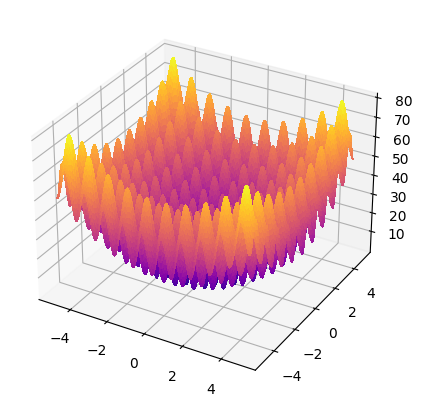

In [63]:
N_POINTS = 200
r = np.linspace(-5, 5, N_POINTS)

x = np.array(np.meshgrid(r, r))
z = rastrigin(x)
y = rastrigin(np.array([-5]))
logging.info(f"{y}")
plt.figure(figsize=(5, 5))
ax = plt.axes(projection="3d")
ax.plot_surface(*np.meshgrid(r, r), z, rstride=1, cstride=1, cmap=cm.plasma, linewidth=0, antialiased=False)
None

In [64]:
def boltzmann(e_new : float, e: float, temperature: float) -> float:
    return np.exp(-(e_new - e) / temperature)

def linear_temperature_schedule(curr_step, max_step):
    return max_step - (curr_step + 1) 

def alpha_temperature_schedule(temperature, alpha):
    return alpha * temperature

def probability_function(e, e_new, temperature):
    if e_new < e :
        return 1
    return boltzmann(e_new, e, temperature)

def rand_sample(domain):
    domain_len = domain[1] - domain[0]
    rand = random.random() * domain_len + domain[0]
    return rand

def neighbor(s, lower, upper):
    rand_offset = np.random.rand(2) * 2 - 1
    ret = s + rand_offset
    ret[ret < lower] = lower 
    ret[ret > upper] = upper
    return ret

def simulated_annealing(domain: list, obj_function, max_step = 10_000):
    
    start_point = [rand_sample(d) for d in domain ]
    current = np.array(start_point)
    temperature = 1000
    logging.info(f"Starting point: {current}.")
    for t in range(max_step):
        temperature = alpha_temperature_schedule(temperature, 0.9)

        if temperature == 0:
            return current
        
        next = neighbor(current, -5, 5)
        
        e = obj_function(current)
        e_new = obj_function(next)
        delta_E = e_new - e

        if probability_function(e, e_new, temperature) >= random.random():
            current = next
        #logging.info(f"next {current}")
    return current

In [65]:
solution = simulated_annealing([[-5, 5], [-5, 5]], rastrigin, 10_000)
logging.info(f"{solution}")
rastrigin(solution)


[07:52:55] INFO: Starting point: [3.95015792 2.69825828].
C:\Users\serra\AppData\Local\Temp\ipykernel_6808\10067170.py:2: RuntimeWarning: overflow encountered in double_scalars
  return np.exp(-(e_new - e) / temperature)
[07:52:55] INFO: [-0.00855845 -0.00101063]


0.014730774334535951